## K-Fold Cross Validation කියන්නේ Machine Learning models වල performance එක නිවැරදිව මැනීමට භාවිතා කරන ක්‍රමවේදයකි.

## මූලික සංකල්පය

🎯 **සරල අර්ථකථනය**: ඔබේ data set එක K කොටස් වලට බෙදලා, එක් කොටසක් testing සඳහාත්, ඉතිරි කොටස් training සඳහාත් භාවිතා කිරීම.

## K-Fold Cross Validation වල පියවර

### 1. Data විභාගය (Data Splitting)
- සම්පූර්ණ dataset එක **K සමාන කොටස්** වලට බෙදන්න
- සාමාන්‍යයෙන් K = 5 හෝ K = 10 භාවිතා කරනවා

### 2. Training සහ Testing
- **K වතාවක්** model එක train කරන්න
- සෑම වතාවකම **වෙනස් කොටසක්** testing සඳහා භාවිතා කරන්න

### 3. Performance ගණනය කිරීම
- සෑම fold එකකම accuracy එක ගණනය කරන්න
- **සාමාන්‍ය accuracy** එක ගණනය කරන්න

## උදාහරණය - 5-Fold Cross Validation

```
Dataset: [A, B, C, D, E] (5 කොටස්)

Fold 1: Train=[B,C,D,E], Test=[A]
Fold 2: Train=[A,C,D,E], Test=[B]  
Fold 3: Train=[A,B,D,E], Test=[C]
Fold 4: Train=[A,B,C,E], Test=[D]
Fold 5: Train=[A,B,C,D], Test=[E]
```

## විශේෂ වර්ග

### 1. Stratified K-Fold
```python
from sklearn.model_selection import StratifiedKFold

# Class distribution එක maintain කරන්න
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skfold)
```

### 2. Leave-One-Out (LOO)
```python
from sklearn.model_selection import LeaveOneOut

# K = n (සියලුම samples)
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo)
```

## K-Fold CV වල වාසි

✅ **Overfitting අවම කරයි**: සියලුම data points testing සඳහා භාවිතා වේ  
✅ **Reliable results**: වඩා විශ්වසනීය performance metrics  
✅ **Data efficiency**: සම්පූර්ණ dataset එකම training සහ testing සඳහා භාවිතා වේ  
✅ **Variance අවම කරයි**: Multiple evaluations නිසා stable results  

## අවාසි

❌ **Computational cost**: K වතාවක් model train කරන්න ඕනේ  
❌ **Time consuming**: විශාල datasets සඳහා කාලය ගතවේ  
❌ **Memory usage**: Multiple models memory එකේ store කරන්න ඕනේ  

## Mnemonics (මතක සටහන්)

### "KFOLD" Mnemonic:
- **K** - කොටස් කරන්න (Split into K parts)
- **F** - සෑම Fold එකකම (For each Fold)  
- **O** - එක් කොටසක් Outside (One part Outside for testing)
- **L** - ඉතිරි කොටස් Learn (Rest Learn/Train)
- **D** - ප්‍රතිඵල Determine කරන්න (Determine results)

### "TRAIN-TEST" Pattern:
```
🚂 TRAIN → 🧪 TEST → 📊 SCORE
   (4/5)     (1/5)      (Accuracy)
```

| ✅ **භාවිතා කරන්න** | ❌ **භාවිතා නොකරන්න** |
|----------------------|-------------------------|
| 📊 Small to medium datasets සඳහා | 💾 Very large datasets (computational cost) |
| 🔄 Model comparison සඳහා | ⏰ Time series data (temporal order important) |
| ⚙️ Hyperparameter tuning සඳහා | ⚖️ Highly imbalanced datasets (without stratification) |
| 📈 Final model performance evaluate කරන්න | 🚀 Real-time applications (speed critical) |
| 🎯 Model selection සඳහා | 🔒 Privacy-sensitive data (multiple copies) |
| 📋 Research සහ experimentation | 💰 Limited computational resources |

## Best Practices

### 1. K Value තෝරන්න
```python
# Common choices
k_values = [3, 5, 10]

# Small datasets: k=5 හෝ k=10
# Large datasets: k=3 හෝ k=5
# Very small datasets: Leave-One-Out
```

### 2. Stratification භාවිතා කරන්න
```python
# Classification සඳහා
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
```

### 3. Random State Set කරන්න
```python
# Reproducible results සඳහා
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
```

## සාරාංශය

K-Fold Cross Validation යනු:
- Model performance නිවැරදිව මැනීමේ ක්‍රමයක්
- Data එක K කොටස් වලට බෙදීම
- K වතාවක් train/test කිරීම  
- Average performance ගණනය කිරීම

**මතක තබා ගන්න**: "විශ්වසනීය results සඳහා, data එක කොටස් කරලා multiple times test කරන්න!"

---

**Tips**: 
- සුළු datasets සඳහා k=10 වඩා හොඳයි
- විශාල datasets සඳහා k=5 ප්‍රමාණවත්
- Class imbalance තිබේ නම් StratifiedKFold භාවිතා කරන්න

In [231]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (StratifiedKFold,cross_validate)
from sklearn.metrics import (confusion_matrix,f1_score,recall_score,precision_score,accuracy_score)

In [232]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

## 3. K-Fold Cross Validation Configuration

Setting up StratifiedKFold to maintain class distribution across folds.

In [233]:
cv = StratifiedKFold(
    n_splits=6,
    random_state=42,
    shuffle=True
)

In [234]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

In [235]:
cv_results = cross_validate(
    model_lr,
    X_train,
    Y_train,
    cv=cv,
    scoring='accuracy',
    return_train_score=False
)

In [236]:
cv_results

{'fit_time': array([0.01791811, 0.00717783, 0.00675416, 0.01044774, 0.00696111,
        0.0069139 ]),
 'score_time': array([0.00100493, 0.00047493, 0.00056481, 0.00027323, 0.00041413,
        0.00023794]),
 'test_score': array([0.72443182, 0.70123106, 0.70251066, 0.73140692, 0.7200379 ,
        0.72856466])}

In [237]:
score_metrics = ['accuracy', 'precision', 'recall', 'f1']
for s in score_metrics:
    cv_results = cross_validate(
        model_lr,
        X_train,
        Y_train,
        cv=cv,
        scoring=s,
        return_train_score=False
        )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    # print(test_score_avg)

    print(f'{s}\t\t{test_score_avg}')

accuracy		0.7180305019044063
precision		0.7163041550573662
recall		0.7224515594331945
f1		0.7193121063357041


In [238]:
cv_results_f1_fixed = cross_validate(
        model_lr,
        X_train,
        Y_train,
        cv=cv,
        scoring='f1',
        return_train_score=False
        )
        
cv_results_f1_fixed_test_score = cv_results_f1_fixed['test_score']
best_index = np.argmax(cv_results_f1_fixed_test_score)

fold_indices = list(cv.split(X_train,Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_BEST = X_train[best_train_idx]
Y_train_BEST = Y_train[best_train_idx]
X_test_BEST = X_train[best_train_idx]
Y_test_BEST = Y_train[best_train_idx]
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

model_lr.fit(X_train_BEST,Y_train_BEST)

LogisticRegression(max_iter=1000, random_state=42)

In [239]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

--- Model Performance Metrics ---
| Metric    | Score   |
|-----------|---------|
| Accuracy  | 0.6958  |
| Precision | 0.3445  |
| Recall    | 0.6835  |
| F1-Score  | 0.4581  |
---------------------------------


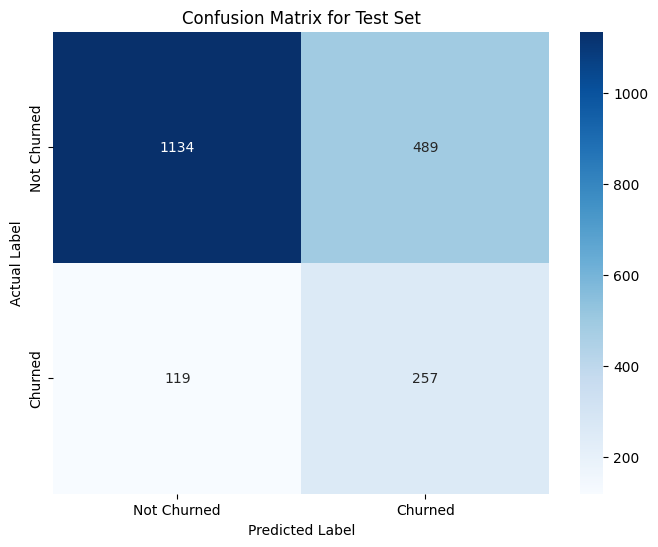

In [240]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

print("--- Model Performance Metrics ---")
print(f"| Metric    | Score   |")
print(f"|-----------|---------|")
print(f"| Accuracy  | {accuracy:.4f}  |")
print(f"| Precision | {precision:.4f}  |")
print(f"| Recall    | {recall:.4f}  |")
print(f"| F1-Score  | {f1:.4f}  |")
print("---------------------------------")

cm = confusion_matrix(Y_test, Y_hat_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Test Set')
plt.show()